<a href="https://colab.research.google.com/github/Reeshad-Khan/Machine-Learning/blob/master/Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **load required libraries**

In [80]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt


**Downloading data**

In [81]:
!wget -O data.csv https://drive.google.com/file/d/1NqjIYWiHAOKn5G_mCzgVBtaLpNVZ_SOO/view?usp=sharing

--2021-04-09 15:29:39--  https://drive.google.com/file/d/1NqjIYWiHAOKn5G_mCzgVBtaLpNVZ_SOO/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 209.85.200.139, 209.85.200.100, 209.85.200.113, ...
Connecting to drive.google.com (drive.google.com)|209.85.200.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.google.com/file/d/1NqjIYWiHAOKn5G_mCzgVBtaLpNVZ_SOO/view?usp%3Dsharing&followup=https://drive.google.com/file/d/1NqjIYWiHAOKn5G_mCzgVBtaLpNVZ_SOO/view?usp%3Dsharing [following]
--2021-04-09 15:29:39--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.google.com/file/d/1NqjIYWiHAOKn5G_mCzgVBtaLpNVZ_SOO/view?usp%3Dsharing&followup=https://drive.google.com/file/d/1NqjIYWiHAOKn5G_mCzgVBtaLpNVZ_SOO/view?usp%3Dsharing
Resolving accounts.google.com (accounts.google.com)... 108.177.121.84, 2607:f8b0:4

**Read data using pandas dataframe**

In [82]:
df = pd.read_csv('/content/drive/MyDrive/data.csv', delimiter=",")
df

,3.7174,56.325,58.974,9.256,0.45627,5.795,13.638,-0.14328,1.7739,7.7725,20.93,19.234,3,1,4,1.1
0,2.7534,56.749,56.848,9.5115,0.085101,10.3730,15.042,0.92653,0.35062,2.8064,18.145,18.972,1,2,3,1
1,2.0278,52.769,56.428,9.4282,0.781760,5.8555,17.612,0.08183,0.33566,3.2427,13.567,19.936,2,1,1,1
2,3.3783,44.768,57.687,9.7385,0.534460,6.0956,17.308,-1.53160,1.29820,8.7503,21.949,19.620,1,1,4,1
3,3.7983,46.136,59.557,9.8185,0.981570,9.5196,12.607,1.30570,1.16600,3.9632,17.934,19.480,1,2,3,1
4,3.0917,51.560,57.406,9.1364,0.406030,9.2565,17.626,0.10152,0.34597,5.9328,22.293,19.664,4,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,2.9013,47.805,58.805,9.7700,0.196530,5.8620,12.993,1.45980,0.47724,6.9010,26.643,20.365,1,2,3,1
7995,4.2219,40.969,57.781,9.2291,0.366670,8.4966,15.177,0.25724,1.03980,3.8663,22.070,19.177,3,1,5,1
7996,2.2153,51.074,58.425,9.3208,0.195230,9.9987,16.745,0.11213,0.78606,4.8264,21.871,20.084,2,1,3,1
7997,6.4175,25.005,52.064,11.1930,1.584400,10.3250,18.212,0.88258,4.84840,10.4460,21.665,16.052,5,3,10,2


In [104]:
df.shape

(7999, 16)

In [26]:
sample = df.iloc[:,0:15]
sample

,3.7174,56.325,58.974,9.256,0.45627,5.795,13.638,-0.14328,1.7739,7.7725,20.93,19.234,3,1,4
0,2.7534,56.749,56.848,9.5115,0.085101,10.3730,15.042,0.92653,0.35062,2.8064,18.145,18.972,1,2,3
1,2.0278,52.769,56.428,9.4282,0.781760,5.8555,17.612,0.08183,0.33566,3.2427,13.567,19.936,2,1,1
2,3.3783,44.768,57.687,9.7385,0.534460,6.0956,17.308,-1.53160,1.29820,8.7503,21.949,19.620,1,1,4
3,3.7983,46.136,59.557,9.8185,0.981570,9.5196,12.607,1.30570,1.16600,3.9632,17.934,19.480,1,2,3
4,3.0917,51.560,57.406,9.1364,0.406030,9.2565,17.626,0.10152,0.34597,5.9328,22.293,19.664,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,2.9013,47.805,58.805,9.7700,0.196530,5.8620,12.993,1.45980,0.47724,6.9010,26.643,20.365,1,2,3
7995,4.2219,40.969,57.781,9.2291,0.366670,8.4966,15.177,0.25724,1.03980,3.8663,22.070,19.177,3,1,5
7996,2.2153,51.074,58.425,9.3208,0.195230,9.9987,16.745,0.11213,0.78606,4.8264,21.871,20.084,2,1,3
7997,6.4175,25.005,52.064,11.1930,1.584400,10.3250,18.212,0.88258,4.84840,10.4460,21.665,16.052,5,3,10


In [89]:
label = df.iloc[:,-1:]
label

,1.1
0,1
1,1
2,1
3,1
4,1
...,...
7994,1
7995,1
7996,1
7997,2


**Lets define X, and y for our dataset:**

In [91]:
X = np.asarray(sample)
X

array([[ 2.75, 56.75, 56.85, ...,  1.  ,  2.  ,  3.  ],
       [ 2.03, 52.77, 56.43, ...,  2.  ,  1.  ,  1.  ],
       [ 3.38, 44.77, 57.69, ...,  1.  ,  1.  ,  4.  ],
       ...,
       [ 2.22, 51.07, 58.42, ...,  2.  ,  1.  ,  3.  ],
       [ 6.42, 25.  , 52.06, ...,  5.  ,  3.  , 10.  ],
       [ 3.37, 40.32, 55.56, ...,  2.  ,  2.  ,  1.  ]])

In [92]:
y = np.asarray(label)
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [2],
       [1]])

**Also, we normalize the dataset:**

In [93]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-0.85,  1.14,  0.2 , ..., -1.17,  0.14, -0.38],
       [-1.33,  0.67,  0.1 , ..., -0.64, -0.95, -1.21],
       [-0.43, -0.27,  0.4 , ..., -1.17, -0.95,  0.04],
       ...,
       [-1.21,  0.47,  0.58, ..., -0.64, -0.95, -0.38],
       [ 1.59, -2.59, -0.95, ...,  0.95,  1.23,  2.55],
       [-0.44, -0.79, -0.11, ..., -0.64,  0.14, -1.21]])

# Train/Test dataset

**Okay, we split our dataset into train and test set:**

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6399, 15) (6399, 1)
Test set: (1600, 15) (1600, 1)


## Modeling (Logistic Regression with Scikit-learn)

We build our model using **LogisticRegression** from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models. **C** parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization. We fit our model with train set:

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

**Now we can predict using our test set:**

In [107]:
yhat = LR.predict(X_test)
yhat

array([2, 1, 1, ..., 2, 1, 1])

**predict_proba** returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [108]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[5.00e-04, 9.99e-01],
       [9.85e-01, 1.45e-02],
       [9.58e-01, 4.21e-02],
       ...,
       [1.15e-03, 9.99e-01],
       [9.84e-01, 1.63e-02],
       [9.96e-01, 3.83e-03]])

## **Evaluation**

**jaccard index¶**

Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [109]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

1.0

## **confusion matrix¶**
Another way of looking at accuracy of classifier is to look at **confusion matrix**.

In [110]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[1299    0]
 [   0    0]]


Confusion matrix, without normalization
[[1299    0]
 [   0    0]]


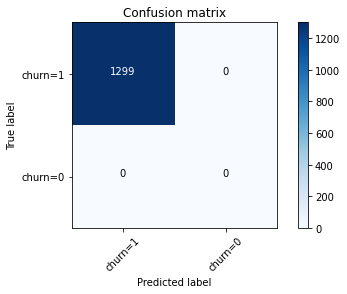

In [111]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [112]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1299
           2       1.00      1.00      1.00       301

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



**log loss**

In [113]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.025625369101540656